In [6]:
using ExpandLGF
using ExpandLGF: inner_integral_quad, inner_integral_expansion
using QuadGK
using PyPlot

Evaluate the convergence of the inner integral $I_{\sigma, n}(t)$ computed via series expansion. The integral is defined by
\begin{equation}
    I_{\sigma, n}(t) = \frac{1}{2\pi} \int_{-\pi}^\pi e^{-t\sigma(k)} \cos(n k)\,\mathrm{d}k,
\end{equation}
and the series expansion takes the form
\begin{equation}
    I_{\sigma, n}(t) = \frac{1}{\sqrt{4\pi t}} \sum_{j=0}^{J} b_j(n) t^{-j} + \mathcal{O}(t^{-\frac{2J + 3}{2}}),
\end{equation}
where each $b_{j}(n)$ is an even polynomial of degree $2j$.

To measure convergence the error between direct numerical quadrature and a truncated series expansion is evlauted for increasing values of $t$. The error converges with power law scaling.

In [7]:
###
# Parameters
###
order = 4
stencil = StandardDifference3D(order)
n = 16
t = exp10.(1.0:0.05:6.0)
max_terms = 12

12

In [8]:
###
# Generate data using either direct quadrature or an expansion (~15 seconds)
###
numerical_values = [inner_integral_quad(stencil, n, ti; atol = 1e-16) for ti in t]

analytical_values = Vector{Float64}[]
for terms = 1:max_terms
    expansion = ExpandLGF.inner_integral_expansion(stencil, terms)
    push!(analytical_values, [expansion(n, ti) for ti in t])
end

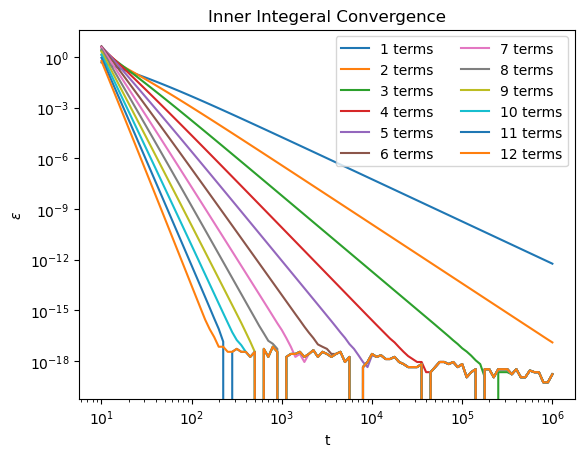

PyObject <matplotlib.legend.Legend object at 0x29af29e50>

In [9]:
###
# Plot convergence
###
fig, ax = subplots()

for terms = 1:max_terms
    error = abs.(numerical_values - analytical_values[terms])
    ax.loglog(t, error, label = string(terms) * " terms")
end

ax.set_title("Inner Integeral Convergence")
ax.set_xlabel("t")
ax.set_ylabel(L"\epsilon")
ax.legend(ncol = 2)